In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
corr_matrix = df.corr()
corr_matrix['Age'].sort_values(ascending=False)

Age                1.000000
Purchased          0.622454
EstimatedSalary    0.155238
Name: Age, dtype: float64

In [6]:
X=df.loc[:,["Age"]].values
Y=df["Purchased"]

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.6,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
y_predicted=logisticRegr.predict(X_test_scaled)

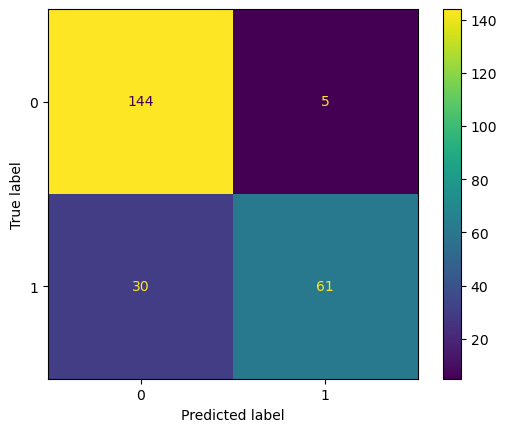

In [11]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

In [12]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_predicted).ravel()
print("True Negatives :" ,tn)
print("False Positives :",fp)
print("False Negatives :",fn) 
print("True Positives :" ,tp)

True Negatives : 144
False Positives : 5
False Negatives : 30
True Positives : 61


In [13]:
from sklearn.metrics import classification_report
metric = classification_report(y_test, y_predicted)
print(metric)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       149
           1       0.92      0.67      0.78        91

    accuracy                           0.85       240
   macro avg       0.88      0.82      0.83       240
weighted avg       0.86      0.85      0.85       240



In [14]:
error_rate=(fp+fn)/(tn+fp+fn+tp)
print(error_rate)

0.14583333333333334


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

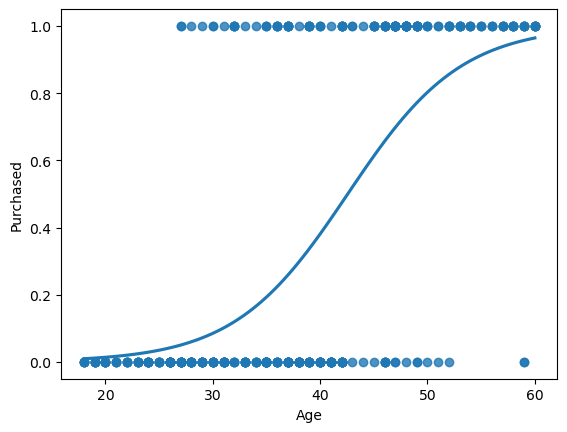

In [15]:
sns.regplot(x=df["Age"],y=Y,logistic=True, ci=None)